# Sergio Mauricio Guerrero Gaona

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
# load data
df = pd.read_csv('Auto.csv')

## (a) - Creation of mpg01 variable. 

In [3]:
mpg_med = np.median(df['mpg'])

df['mpg01'] = df.apply(lambda x: 1 if x['mpg'] > mpg_med else 0, axis=1)

## (b) - Graphical Exploration

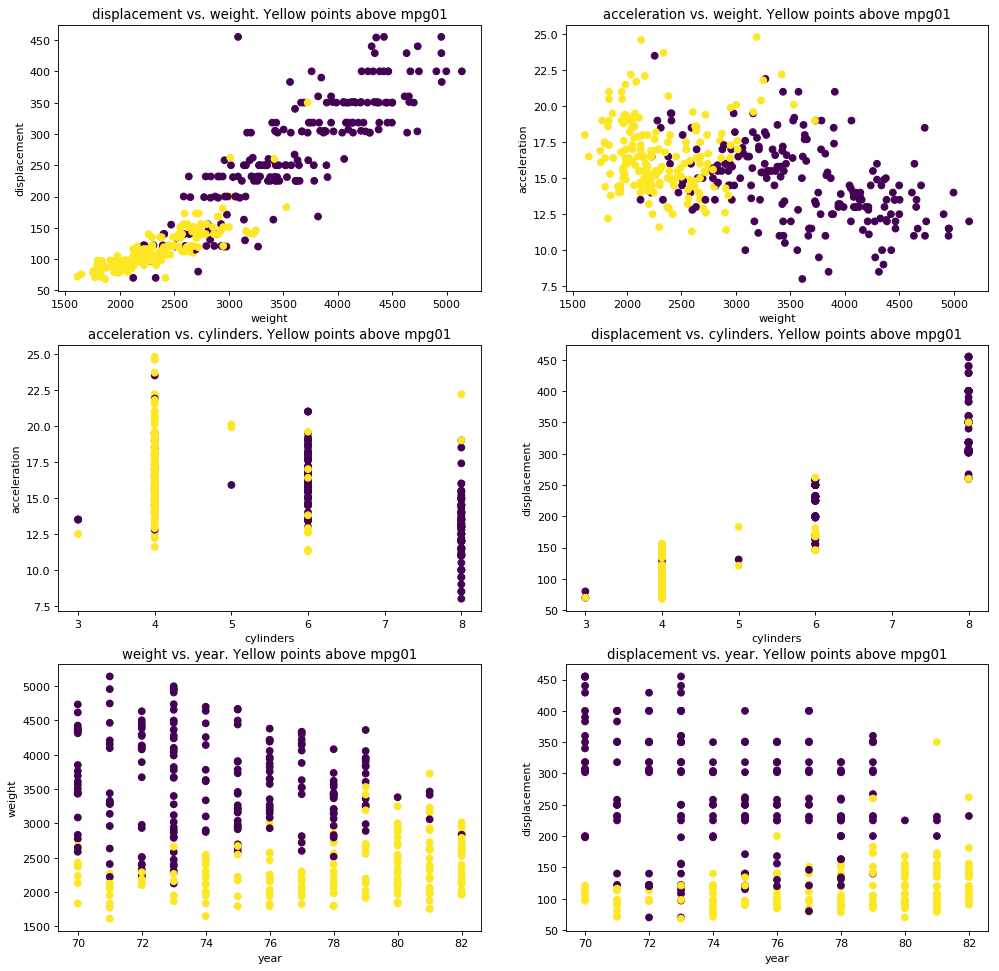

In [4]:
plt.figure(figsize=(15,15), dpi=80)

plt.subplot(3,2,1)
plt.xlabel('weight')
plt.ylabel('displacement')
plt.title('displacement vs. weight. Yellow points above mpg01')
plt.scatter(df['weight'], df['displacement'], c=df['mpg01'])

plt.subplot(3,2,2)
plt.xlabel('weight')
plt.ylabel('acceleration')
plt.title('acceleration vs. weight. Yellow points above mpg01')
plt.scatter(df['weight'], df['acceleration'], c=df['mpg01'])


plt.subplot(3,2,3)
plt.xlabel('cylinders')
plt.ylabel('acceleration')
plt.title('acceleration vs. cylinders. Yellow points above mpg01')
plt.scatter(df['cylinders'], df['acceleration'], c=df['mpg01'])

plt.subplot(3,2,4)
plt.xlabel('cylinders')
plt.ylabel('displacement')
plt.title('displacement vs. cylinders. Yellow points above mpg01')
plt.scatter(df['cylinders'], df['displacement'], c=df['mpg01'])


plt.subplot(3,2,5)
plt.xlabel('year')
plt.ylabel('weight')
plt.title('weight vs. year. Yellow points above mpg01')
plt.scatter(df['year'], df['weight'], c=df['mpg01'])

plt.subplot(3,2,6)
plt.xlabel('year')
plt.ylabel('displacement')
plt.title('displacement vs. year. Yellow points above mpg01')
plt.scatter(df['year'], df['displacement'], c=df['mpg01'])

From the plots above, it seems that displacement, cylinder count, and weight are good predictor variables for mpg01. 

Displacement should increase close to linearly with cylinder count. Cars with lower displacement/cylinders have smaller, more efficient engines. 

Also, more recent cars tend to have smaller engines that are more efficient. As can be seen in the displacement vs. year plot, most of the cars from years 80-82 have an mpg higher than mpg01. In that same plot, moslty all cars with displacements less than 150 have an mpg higher than mpg01.

Heavier cars are bound to be less efficeint and have less acceleration. In the acceleration vs weight plot we see that most cars heaiver than 3000 have an mpg less than mpg01.

## (c) - Splitting Data into Test/Train 

In [5]:
from sklearn.model_selection import train_test_split
#
# Create y vector
y = df['mpg01']
#
# Create X matrix with cylinders, displacement, weight.
X = df.loc[:, 'cylinders':'weight']
X = X.drop('horsepower', axis=1)
#
# Split data into a training and testing set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.50, random_state=42
)

## (d) - Performing LDA

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
#
# Define model
lda_clf = LinearDiscriminantAnalysis()
#
# Fit model
lda_clf.fit(X_train, y_train)
#
# Predict y_train
y_hat = lda_clf.predict(X_test)
#
# Calculate test error
test_error = 1 - lda_clf.score(X_test, y_test)
#
# Compute confution matrix
c_mtx = confusion_matrix(y_test, y_hat)
c_mtx, test_error

(array([[75, 23],
        [ 6, 95]]), 0.14572864321608037)

The test error of the LDA model is $14.57$% with the particular training and testing partitions that were generated in step (c).

## (e) - Performing QDA

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#
# Define model
qda_clf = QuadraticDiscriminantAnalysis()
#
# Fit model
qda_clf.fit(X_train, y_train)
#
# Predict y_train
y_hat = qda_clf.predict(X_test)
#
# Calculate test error
test_error = 1 - qda_clf.score(X_test, y_test)
#
# Compute confution matrix
c_mtx = confusion_matrix(y_test, y_hat)
c_mtx, test_error

(array([[84, 14],
        [ 8, 93]]), 0.11055276381909551)

The test error of the QDA model is $11.06$% with the particular training and testing partitions that were generated in step (c).

## (f) - Performing Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
#
# Define model
lr_clf = LogisticRegression()
#
# Fit model
lr_clf.fit(X_train, y_train)
#
# Predict y_train
y_hat = lr_clf.predict(X_test)
#
# Calculate test error
test_error = 1 - lr_clf.score(X_test, y_test)
#
# Compute confution matrix
c_mtx = confusion_matrix(y_test, y_hat)
c_mtx, test_error

(array([[79, 19],
        [ 9, 92]]), 0.14070351758793975)

The test error of the Logistic Regression model is $14.07$% with the particular training and testing partitions that were generated in step (c).

## (g) - Performing $k$-NN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
#
# Create classifiers with k = 1, ..., 20
max_k = 100
classifiers = [KNeighborsClassifier(n_neighbors=i, n_jobs=3) 
               for i in range(1, max_k + 1)]
#
# Fit all classifiers
classifiers = list(map(lambda x: x.fit(X_train, y_train), classifiers))
#
# Score all classifiers
errors = list(map(lambda x: 1 - x.score(X_test, y_test), classifiers))
#
# get best
best_error = min(errors)
best_k = np.argmin(errors)

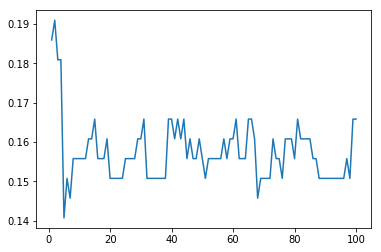

In [10]:
# plot scores
plt.figure()
plt.plot(range(1,max_k + 1), errors)

In [11]:
best_k, best_error

(4, 0.14070351758793975)

Test errors for the trained $k$-NN models are plotted above. The model performed best for $k$ = 4 with an error of $14.07$% with these specific training and testing partitions.